# Using data collected from Google playstore for data analysis


This project is an analysis of the data set collected on Kaggle by Lavanya Gupta, and can be viewed on this website https://www.kaggle.com/lava18/google-play-store-apps.

There are two datasets: one which includes: 
- the name of the Apps, 
- their category, 
- number of reviews, 
- the size of the App, 
- number if intalls, 
- type of app and price,
- the content rating, 
- genre, 
- the last time it was updated, 
- current version and android version.

the second data set contains:
- App	
- Translated_Review	Sentiment	
- Sentiment_Polarity	
- Sentiment_Subjectivity

I will be using the python libraries numpy, pandas, matplotlib and seaborn to clean and prepare the data to create graphs and answer five questions using the techniques I have gained from [the course](http://zerotopandas.com).

As a first step, let's upload our Jupyter notebook to [Jovian.ml](https://jovian.ml).

In [1]:
project_name = "Play_Store_Data_Analysis " 

## Data Preparation and Cleaning

There is quite a bit of information in these files which will be merged at some point. However, though I will keep them (more for asthetics than true usefulness), I feel that the most useful columns will be the App, Category, App, Rating, Reviews, Size, Installs, Price, Content Rating and Genres column from the googleplaystore csv and the App, Sentiment, Sentiment_Polarity	and Sentiment_Subjectivity columns in the googleplaystore_user_reviews csv. Let's begin by:

- importing the files,
- the shape,
- null values
- data frame (playStore_df) info and
- a sample of the playStore_df data 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [3]:
playStore_df = pd.read_csv('googleplaystore.csv')
playStoreReviews_df = pd.read_csv('googleplaystore_user_reviews.csv')

In [4]:
playStore_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
playStoreReviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [6]:
print(playStore_df.shape)
print(playStoreReviews_df.shape)

(10841, 13)
(64295, 5)


In [7]:
playStore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
playStore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
playStoreReviews_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [10]:
irregular_df = playStore_df[playStore_df['Genres']=='February 11, 2018']

In [11]:
irregular_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
playStore_df.isnull().values.any()

True

In [13]:
playStore_df.isnull().sum().sum()

1487

In [14]:
playStore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [15]:
playStore_df.sample(frac=0.1, replace=True, random_state=1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
5192,AI Face Beauty Analysis - IntelliFace (Free),BEAUTY,3.1,40,13M,"10,000+",Free,0,Everyone,Beauty,"April 11, 2018",20,4.1 and up
905,Food Network,ENTERTAINMENT,4.1,7813,Varies with device,"500,000+",Free,0,Teen,Entertainment,"July 27, 2018",Varies with device,Varies with device
7813,Counter Online FPS Game,GAME,4.2,41089,42M,"5,000,000+",Free,0,Teen,Action,"July 25, 2018",2.7,4.1 and up
2895,HD Camera for Android,PHOTOGRAPHY,4.1,351254,4.0M,"10,000,000+",Free,0,Everyone,Photography,"June 29, 2018",4.6.0.0,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10330,FE Electric & Comp Engineering,FAMILY,NaN,2,20M,500+,Free,0,Everyone,Education,"July 27, 2018",5.33.3669,5.0 and up
4105,Facebook Lite,SOCIAL,4.3,8595964,Varies with device,"500,000,000+",Free,0,Teen,Social,"August 1, 2018",Varies with device,Varies with device
7785,"CR Fans: Mazos, Clanes y Grupos",FAMILY,4.3,219,4.3M,"5,000+",Free,0,Everyone,Entertainment,"December 21, 2017",1.0.7,2.3 and up
860,Mobile TV,ENTERTAINMENT,3.5,10939,4.6M,"10,000,000+",Free,0,Everyone,Entertainment,"April 28, 2016",2.05.0010,5.0 and up


# Exploratory Analysis and Visualization

From the info returned about the data types, we can see that a few columns such as Reviews, Size, Installs and Price are not of type float or int so we will need to convert those columns. We also noticed there was an irreguglar row which may need to be removed.

So for this section, we will:

- investigate the irregular row,
- find out how many different genres there are,
- alter and convert columns so they can be used for calculations and
- Create a few graphs

Let's continue!

In [16]:
playStore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [17]:
irregular_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Remove irregular_df data as the Genre for it does not make any sense - it's a date!

In [18]:
playStore_df = playStore_df[playStore_df['Rating']< 5]

In [19]:
playStore_df.describe()

,Rating
count,9092.000000
mean,4.167400
std,0.503159
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,4.900000


We can see that the number of rows has been reduced by one so the drop has been successful. Next we can look on the types of data we have for each column.

In [20]:
typesofGenres = playStore_df['Genres'].unique()

In [21]:
typesofGenres

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [22]:
numberOfGenres = playStore_df['Genres'].nunique()
numberOfGenres

115

We have removed the irregular row and checked the number of Genres. Now let's change the dtaa types of a few columns.

In [23]:
playStore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 10840
Data columns (total 13 columns):
App               9092 non-null object
Category          9092 non-null object
Rating            9092 non-null float64
Reviews           9092 non-null object
Size              9092 non-null object
Installs          9092 non-null object
Type              9092 non-null object
Price             9092 non-null object
Content Rating    9092 non-null object
Genres            9092 non-null object
Last Updated      9092 non-null object
Current Ver       9088 non-null object
Android Ver       9090 non-null object
dtypes: float64(1), object(12)
memory usage: 994.4+ KB


This isn't very helpful as though Ratings has a data type of float, this does not hold true for the Size, Reviews, Price or even Installs data columns. Therefore, I will need to change them to be able to make use of the data provided. The main issue is to remove the M,k and other additional characters which are hindering the size values being converted into floats.

In [24]:
pd.set_option('mode.chained_assignment', None)
playStore_df['Reviews'] = playStore_df['Reviews'].str.replace('M','')

In [25]:
pd.set_option('mode.chained_assignment', None)
playStore_df['Rating'] = pd.to_numeric(playStore_df.Rating, errors='coerce')


In [26]:
pd.set_option('mode.chained_assignment', None)
playStore_df['Reviews'] = playStore_df['Reviews'].astype('float')

In [27]:
playStore_df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10833                  619k
10834                  2.6M
10836                   53M
10839    Varies with device
10840                   19M
Name: Size, Length: 9092, dtype: object

In [28]:
playStore_df['Size'] = playStore_df['Size'].replace({'M': '','Varies with device':'0','k':''}, regex=True)
playStore_df['Size'] = playStore_df['Size'].str.replace('+','').str.replace(',','')
pd.set_option('mode.chained_assignment', None)

In [29]:
playStore_df['Size'] = playStore_df['Size'].astype('float32')
pd.set_option('mode.chained_assignment', None)

In [30]:
playStore_df['Size'] 

0         19.0
1         14.0
2          8.7
3         25.0
4          2.8
         ...  
10833    619.0
10834      2.6
10836     53.0
10839      0.0
10840     19.0
Name: Size, Length: 9092, dtype: float32

Now that that Size column has been convered into the float data type, the same process must be carried out for the other columns - Price and Installs

In [31]:
playStore_df['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10839    0
10840    0
Name: Price, Length: 9092, dtype: object

Looking at the strings that will be replaced in the Price column, we can see that another error has been made as the column contains the value 'Everyone' which is not numeric. This most likely belongs to the Content Rating column. Instead of removing this row entirely, I will convert it's value to zero instead (mainly for ease but also based on the number of zeroes that are already in the column).

In [32]:
playStore_df['Price'] = playStore_df['Price'].str.replace('$','').str.replace('Everyone','0')
playStore_df['Price'] = playStore_df['Price'].astype('float')

In [33]:
playStore_df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10833    0.0
10834    0.0
10836    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9092, dtype: float64

There doesn't appear to be any other value apart from zero for this column, but in order to be sure but I know that not to be true as I have seen the CSV file in excel and seen other values. To ensure this, I will see what the sum of the Price column is.

In [34]:
playStore_df['Price'].sum()

8898.02

As mentioned before I will now remove commas and + signs and and replace with '' and remove and replace word 'Free' with 0 so that column can be converted into an integer column

In [35]:
playStore_df['Installs'] = playStore_df['Installs'].str.replace('+','').str.replace(',','').str.replace('Free','0')
playStore_df['Installs'] = playStore_df['Installs'].astype('int')

In [36]:
playStore_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9092.000000,9.092000e+03,9092.000000,9.092000e+03,9092.000000
mean,4.167400,5.295412e+05,30.852989,1.843680e+07,0.978665
std,0.503159,3.189785e+06,85.839737,9.254924e+07,16.047995
min,1.000000,1.000000e+00,0.000000,5.000000e+00,0.000000
25%,4.000000,2.507500e+02,2.900000,1.000000e+04,0.000000
50%,4.300000,7.013500e+03,11.000000,5.000000e+05,0.000000
75%,4.500000,8.772575e+04,31.000000,5.000000e+06,0.000000
max,4.900000,7.815831e+07,994.000000,1.000000e+09,400.000000


In [37]:
playStore_df.drop(playStore_df[playStore_df.Rating > 10].index, inplace=True)
playStore_df.drop(playStore_df[playStore_df.Reviews < 500].index, inplace=True)

Let's get a picture of the top 10 apps in the data collected, looking at the difference between the top rated App and the app at the bottom of the list.  The table should be minimised but include the App (so we can see the name), Review (for a comparison of the reviewsd to the rating) and of course the Rating columns.

In [38]:
toprating_df = playStore_df.sort_values('Rating', ascending=False).head(10)[['App','Reviews','Rating']].head(10)

In [39]:
toprating_df

,App,Reviews,Rating
1336,Down Dog: Great Yoga Anywhere,28945.0,4.9
64,DMV Permit Practice Test 2018 Edition,6090.0,4.9
10552,FK Crvena zvezda,1211.0,4.9
1258,Lose Belly Fat in 30 Days - Flat Stomach,38098.0,4.9
10527,FK Željezničar,1420.0,4.9
55,Tickets SDA 2018 and Exam from the State Traff...,10479.0,4.9
4332,EXO-L Amino for EXO Fans,5677.0,4.9
3602,White Noise for Baby,717.0,4.9
61,CDL Practice Test 2018 Edition,7774.0,4.9
1260,Six Pack in 30 Days - Abs Workout,272337.0,4.9


In [40]:
playStore_df['Reviews per thousand'] = playStore_df.Reviews/1000

In [41]:
toprating_df = playStore_df.sort_values('Rating', ascending=False).head(10)[['App','Reviews','Rating','Reviews per thousand']].head(10)
toprating_df

,App,Reviews,Rating,Reviews per thousand
1336,Down Dog: Great Yoga Anywhere,28945.0,4.9,28.945
64,DMV Permit Practice Test 2018 Edition,6090.0,4.9,6.090
10552,FK Crvena zvezda,1211.0,4.9,1.211
1258,Lose Belly Fat in 30 Days - Flat Stomach,38098.0,4.9,38.098
10527,FK Željezničar,1420.0,4.9,1.420
55,Tickets SDA 2018 and Exam from the State Traff...,10479.0,4.9,10.479
4332,EXO-L Amino for EXO Fans,5677.0,4.9,5.677
3602,White Noise for Baby,717.0,4.9,0.717
61,CDL Practice Test 2018 Edition,7774.0,4.9,7.774
1260,Six Pack in 30 Days - Abs Workout,272337.0,4.9,272.337


In [42]:
sns.set_style('darkgrid')

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)

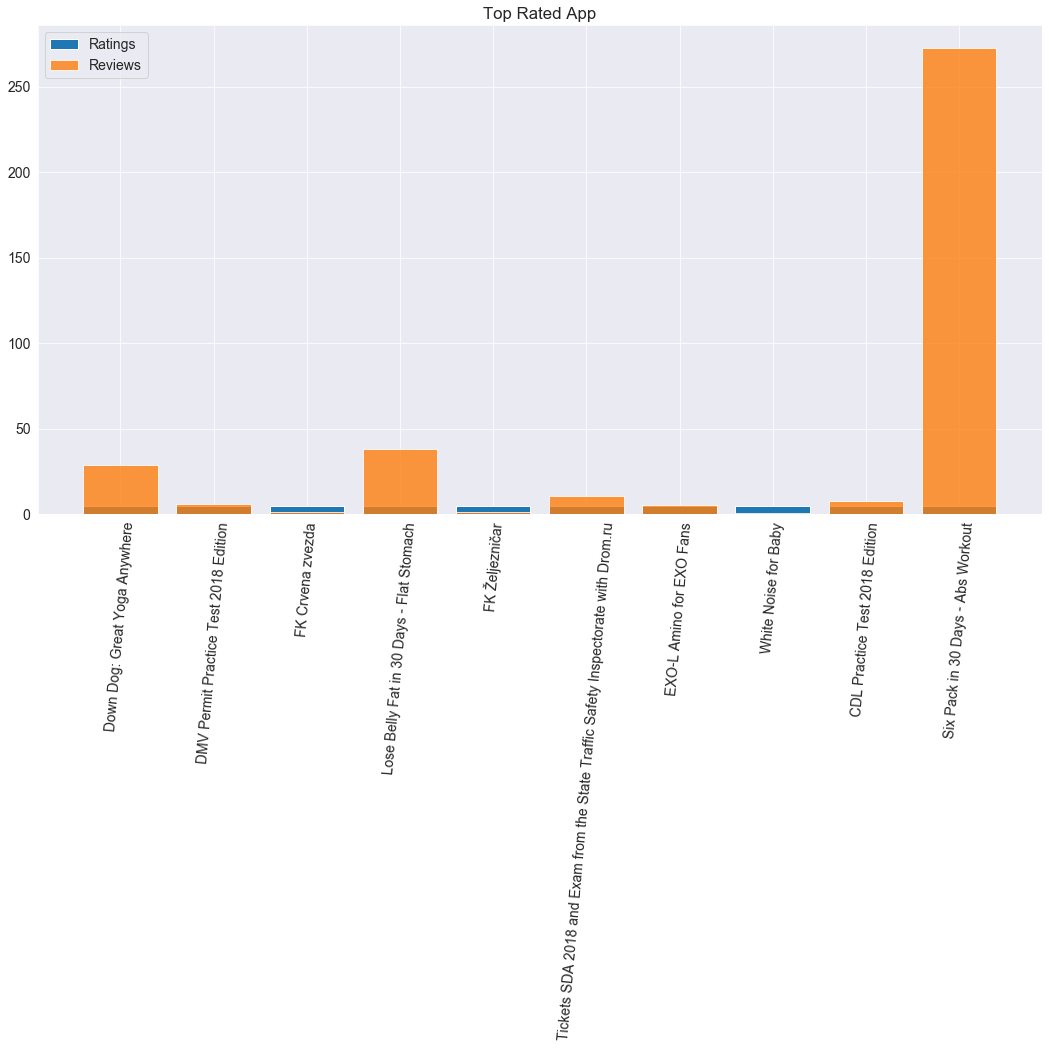

In [43]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=85)
labels = ['Ratings','Reviews']

plt.title('Top Rated App')
plt.bar(toprating_df['App'],toprating_df['Rating'])
plt.bar(toprating_df['App'],toprating_df['Reviews per thousand'], alpha=0.8)
plt.legend(labels = labels)

There appears to be a larger number of content rating's compared to other. It would be interesting to see which rating has the highest count, and put these calues into a pie chart.

In [44]:
topThirtyContent = playStore_df['Content Rating'].value_counts()
topThirtyContent

Everyone           4779
Teen                879
Mature 17+          361
Everyone 10+        346
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

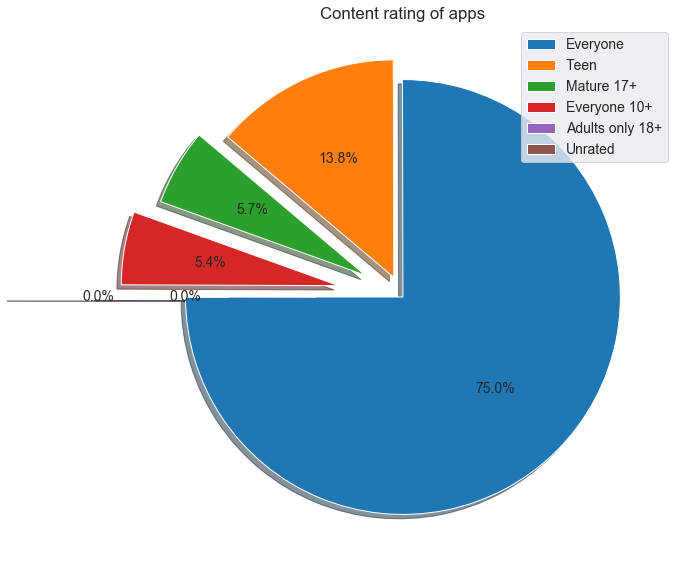

In [45]:
explode = (0,0.1,0.2,0.3,0.4,0.8)
labels = topThirtyContent.index


plt.figure(figsize=(21,10))
plt.title('Content rating of apps')
plt.pie(topThirtyContent, autopct='%1.1f%%', startangle=180, shadow=True, labeldistance=None,
       rotatelabels=True, explode=explode);
plt.legend(labels, loc='upper right')

In [46]:
newplayStore = playStore_df.sort_values('Reviews', ascending=False)[['App','Installs','Reviews','Rating','Genres']]
newplayStore = newplayStore.drop_duplicates(['App']).head(20)
newplayStore

,App,Installs,Reviews,Rating,Genres
2544,Facebook,1000000000,78158306.0,4.1,Social
381,WhatsApp Messenger,1000000000,69119316.0,4.4,Communication
2604,Instagram,1000000000,66577446.0,4.5,Social
382,Messenger – Text and Video Chat for Free,1000000000,56646578.0,4.0,Communication
1879,Clash of Clans,100000000,44893888.0,4.6,Strategy
4005,Clean Master- Space Cleaner & Antivirus,500000000,42916526.0,4.7,Tools
1872,Subway Surfers,1000000000,27725352.0,4.5,Arcade
3665,YouTube,1000000000,25655305.0,4.3,Video Players & Editors
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",500000000,24900999.0,4.7,Tools
1878,Clash Royale,100000000,23136735.0,4.6,Strategy


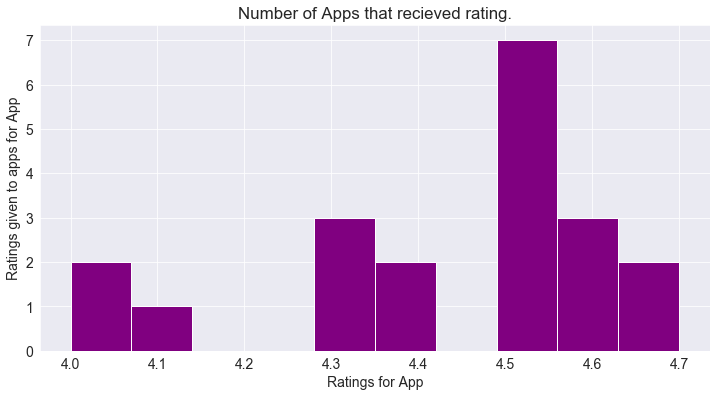

In [47]:
plt.figure(figsize=(12, 6))
plt.title("Number of Apps that recieved rating.")
plt.xlabel('Ratings for App')
plt.ylabel('Ratings given to apps for App')

plt.hist(newplayStore.Rating, color='purple');

We are now going to merge the two data frames to create one data frame - merged_df

In [48]:
merged_df = playStore_df.merge(playStoreReviews_df, on="App")

In [49]:
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews per thousand,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.967,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.967,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.967,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.967,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.967,I love colors inspyering,Positive,0.500,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119724,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,0.0,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,223.941,NaN,NaN,NaN,NaN
119725,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,0.0,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,223.941,NaN,NaN,NaN,NaN
119726,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,0.0,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,223.941,Too much ads,Positive,0.200,0.200000
119727,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,0.0,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,223.941,Just allow time ...,Neutral,0.000,0.000000


Though there are only three types of sentimental values, it would be interesting to view the number of setiments that were positive.

In [50]:
merged_df['Sentiment'].value_counts()

Positive    45185
Negative    17913
Neutral      8039
Name: Sentiment, dtype: int64

We can also compare the highest rated cateogrys to a sample set to see if there are any distinct and concerning differences. The comparison will be made using barplots.

In [51]:
highest_rated_category = merged_df.sort_values('Rating',ascending=False)[['App','Category','Rating']]
highest_rated_category = highest_rated_category.drop_duplicates(['App'])

In [52]:
new_highest_rated_category = highest_rated_category.head(15)
new_highest_rated_category

,App,Category,Rating
635,DMV Permit Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9
541,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9
33166,Down Dog: Great Yoga Anywhere,HEALTH_AND_FITNESS,4.9
15815,FREE LIVE TALK,DATING,4.9
77588,Amino: Communities and Chats,SOCIAL,4.8
117319,Find a Way: Addictive Puzzle,FAMILY,4.8
29908,Home Workout - No Equipment,HEALTH_AND_FITNESS,4.8
103330,Calculator with Percent (Free),TOOLS,4.8
117778,CompTIA Exam Training,FAMILY,4.8
26853,"Even - organize your money, get paid early",FINANCE,4.8


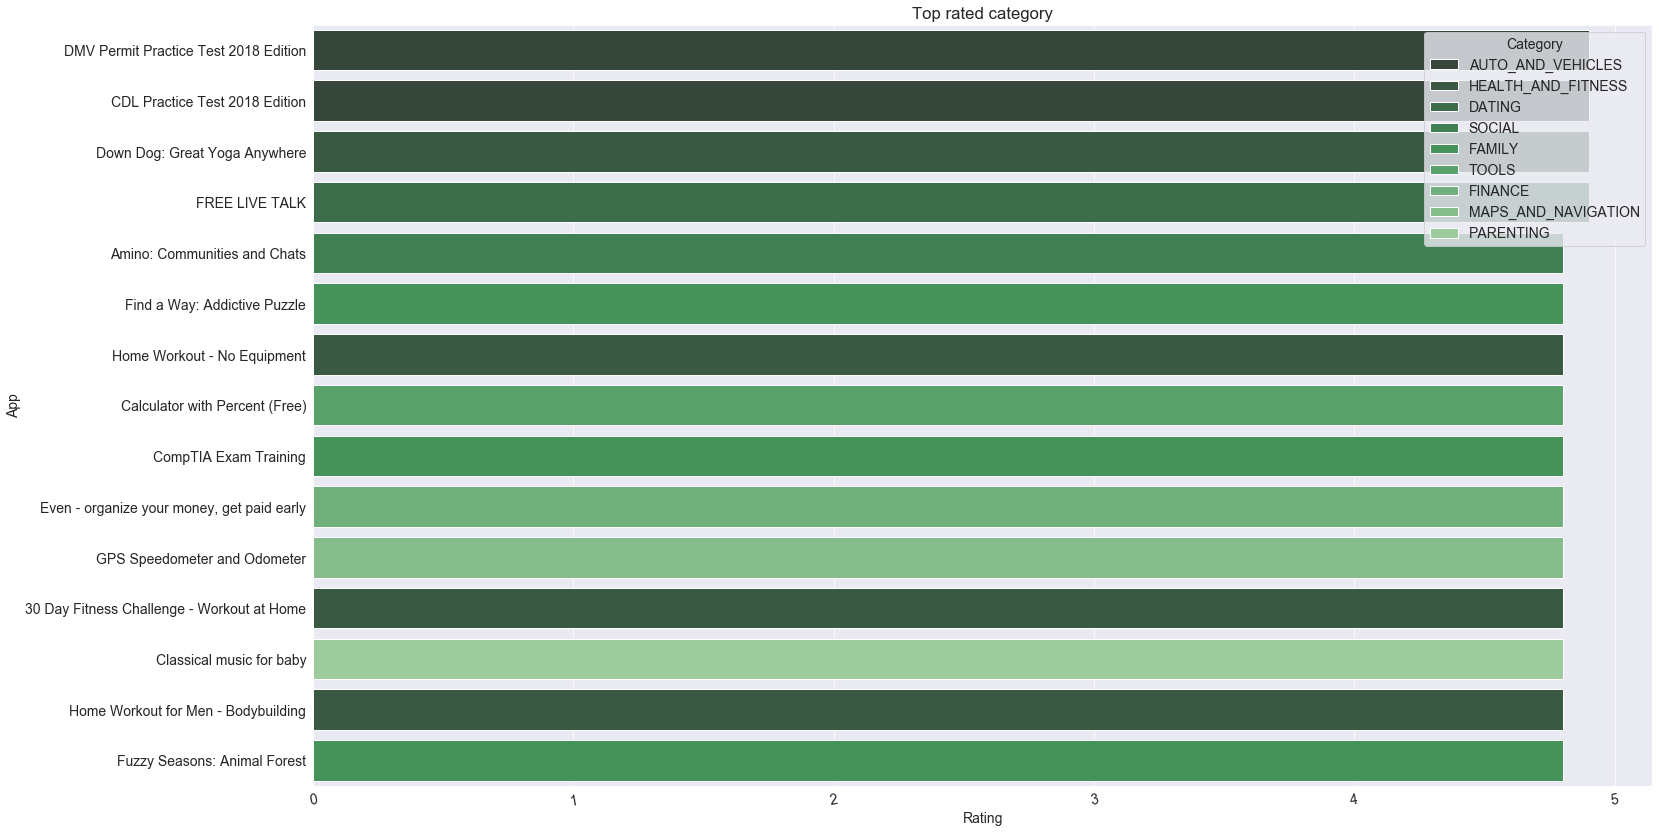

In [53]:
plt.figure(figsize=(24, 14))
plt.title('Top rated category')
plt.xticks(rotation=10)
plt.ylabel('Rating')

sns.barplot(data=new_highest_rated_category,y='App',x='Rating', hue='Category', palette="Greens_d",dodge=False);

In [54]:
sample_df =  merged_df.sample(n=18, replace=True, random_state=1)

In [55]:
highest_rated_category1 = sample_df.sort_values('Rating',ascending=False).head(15)[['App','Category','Rating']]

In [56]:
highest_rated_category1

,App,Category,Rating
98047,Booking.com Travel Deals,TRAVEL_AND_LOCAL,4.7
5192,Crew - Free Messaging and Scheduling,BUSINESS,4.6
31228,Calorie Counter - MyFitnessPal,HEALTH_AND_FITNESS,4.6
43757,Clash Royale,GAME,4.6
49100,8 Ball Pool,GAME,4.5
50057,8 Ball Pool,GAME,4.5
98539,Airbnb,TRAVEL_AND_LOCAL,4.4
97561,Hopper - Watch & Book Flights,TRAVEL_AND_LOCAL,4.4
7751,Firefox Browser fast & private,COMMUNICATION,4.4
98448,Airbnb,TRAVEL_AND_LOCAL,4.4


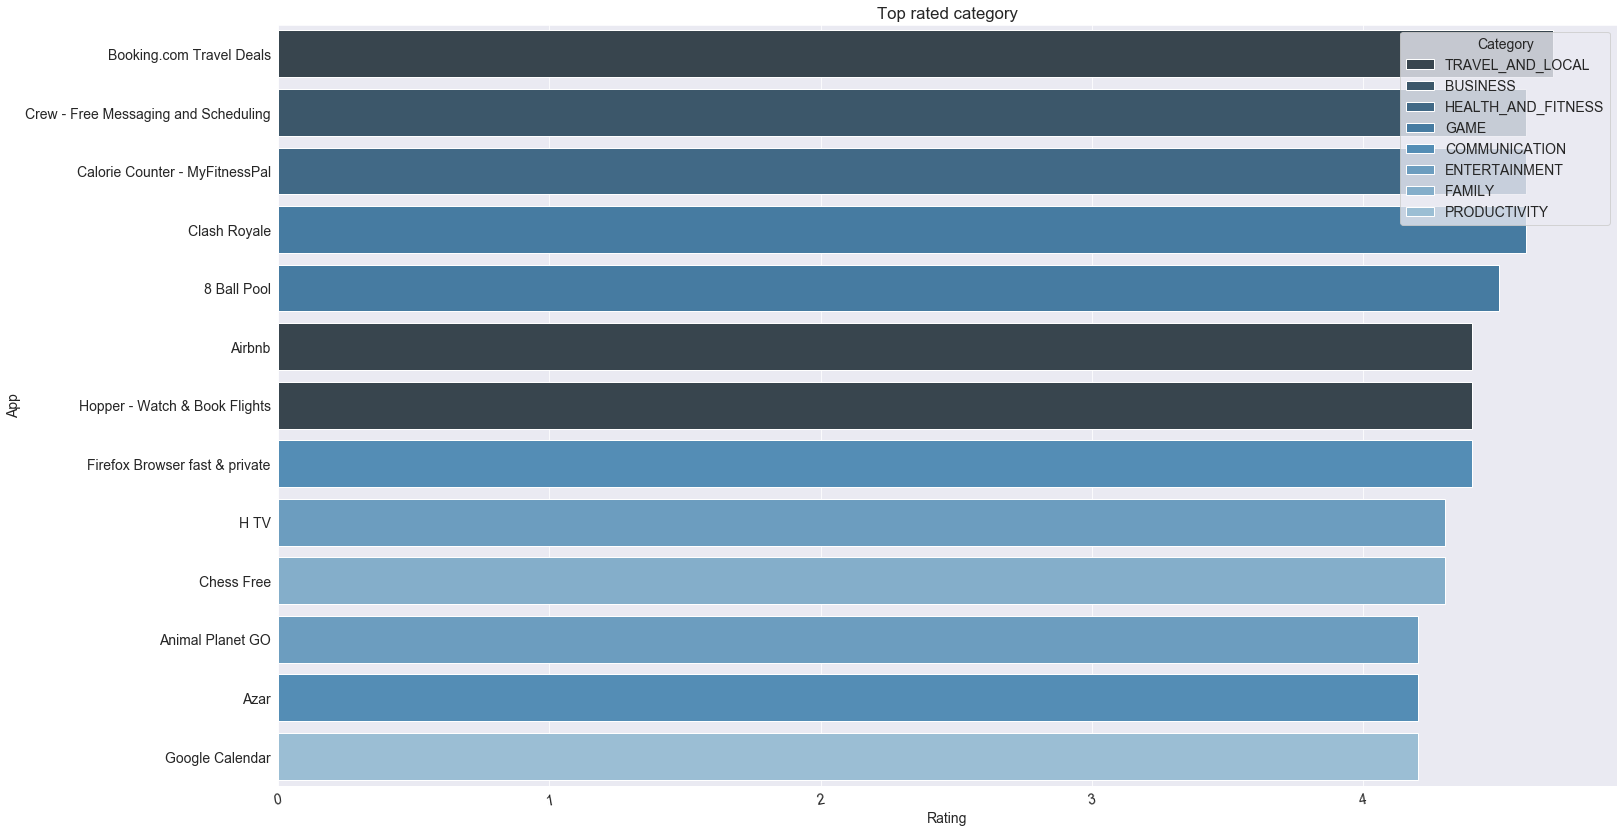

In [57]:
plt.figure(figsize=(24, 14))
plt.title('Top rated category')
plt.xticks(rotation=10)
plt.ylabel('Rating')

sns.barplot(data=highest_rated_category1,y='App',x='Rating', hue='Category', palette="Blues_d",dodge=False);

Though there appears to be more range in variety in values in the sample barplot, there does not appear any drastic differences. The data appears to be satisfactory.

# Asking and Answering Questions

We've already gained some insight about the data but now we are going to asks 5 specific questions about the data we have and also answer them. Here we go...

## Question 1 
Is there a realtionship between customers being happy with the app, and the app being free?

In [58]:
reviewAndSentiment = merged_df.sort_values('Sentiment_Polarity', ascending=False)[['Sentiment_Polarity','Price','Sentiment','Rating']].head(15)

In [59]:
reviewAndSentiment

,Sentiment_Polarity,Price,Sentiment,Rating
95769,1.0,0.0,Positive,4.0
41869,1.0,0.0,Positive,4.5
112755,1.0,0.0,Positive,4.2
63530,1.0,0.0,Positive,4.3
63533,1.0,0.0,Positive,4.3
26138,1.0,0.0,Positive,4.5
26144,1.0,0.0,Positive,4.5
63578,1.0,0.0,Positive,4.3
97219,1.0,0.0,Positive,4.1
117180,1.0,0.0,Positive,3.9


In [60]:
reviewAndSentiment['SentimentValue'] = reviewAndSentiment['Sentiment'].str.replace('Positive','1')
reviewAndSentiment['SentimentValue'] = reviewAndSentiment['SentimentValue'].astype('float')
reviewAndSentiment

,Sentiment_Polarity,Price,Sentiment,Rating,SentimentValue
95769,1.0,0.0,Positive,4.0,1.0
41869,1.0,0.0,Positive,4.5,1.0
112755,1.0,0.0,Positive,4.2,1.0
63530,1.0,0.0,Positive,4.3,1.0
63533,1.0,0.0,Positive,4.3,1.0
26138,1.0,0.0,Positive,4.5,1.0
26144,1.0,0.0,Positive,4.5,1.0
63578,1.0,0.0,Positive,4.3,1.0
97219,1.0,0.0,Positive,4.1,1.0
117180,1.0,0.0,Positive,3.9,1.0


In [61]:
reviewAndSentiment['Sentiment_Polarity']= reviewAndSentiment['Sentiment_Polarity'].astype('float')

In [62]:
reviewAndSentiment.corr()

,Sentiment_Polarity,Price,Rating,SentimentValue
Sentiment_Polarity,NaN,NaN,NaN,NaN
Price,NaN,NaN,NaN,NaN
Rating,NaN,NaN,1.0,NaN
SentimentValue,NaN,NaN,NaN,NaN


While it can be observed that a high sentiment polarity also saw a postive sentiment and sentiment value there does not appear to be a correlation between these two things. However, the ratings appear to be favourable, with the lowest rating being 3.9.

## Question 2
What is the difference in sentiment polarity in the most popular genre compared to the least popular genre?

In [63]:
most_popular_game = merged_df['Genres'].value_counts()
most_popular_game

Sports                       10920
Action                        8580
Health & Fitness              6562
Casual                        5800
Productivity                  5780
                             ...  
Casual;Action & Adventure       40
Education;Pretend Play          40
Art & Design;Creativity         40
Arcade;Action & Adventure       40
Educational;Brain Games         40
Name: Genres, Length: 73, dtype: int64

The most popular genre is Sports and the least popular genre includes a number of genres. let us obtain all of the lowest genres

In [64]:
lowest_genres = most_popular_game[most_popular_game < 41]

In [65]:
lowest_genres

Simulation;Education                 40
Casual;Education                     40
Entertainment;Creativity             40
Parenting;Education                  40
Simulation;Pretend Play              40
Sports;Action & Adventure            40
Educational;Creativity               40
Travel & Local;Action & Adventure    40
Card;Action & Adventure              40
Casual;Action & Adventure            40
Education;Pretend Play               40
Art & Design;Creativity              40
Arcade;Action & Adventure            40
Educational;Brain Games              40
Name: Genres, dtype: int64

In [66]:
sentiment_pop1 = merged_df[merged_df.Genres=='Sports'][['App','Genres','Sentiment_Polarity']]
sentiment_pop1 = sentiment_pop1.drop_duplicates(['App'])
sentiment_pop1 

,App,Genres,Sentiment_Polarity
48617,8 Ball Pool,Sports,NaN
61857,Dream League Soccer 2018,Sports,NaN
88657,ESPN,Sports,NaN
90337,Free Sports TV,Sports,NaN
90377,"FIFA - Tournaments, Soccer News & Live Scores",Sports,0.000000
90537,Futbol24,Sports,NaN
90577,Football Live Scores,Sports,0.338889
90617,BeSoccer - Soccer Live Score,Sports,-0.090476
90657,FotMob - Live Soccer Scores,Sports,NaN
90817,"CBS Sports App - Scores, News, Stats & Watch Live",Sports,NaN


In [67]:
sentiment1 = sentiment_pop1['Sentiment_Polarity'].mean()
sentiment1

0.1647819123450437

In [68]:
for i in lowest_genres.index:
    sentiment_pop2 = merged_df[merged_df.Genres== i][['App','Sentiment_Polarity']]
    sentiment_pop2 = sentiment_pop2.drop_duplicates(['App'])
    print(sentiment_pop2)

                        App  Sentiment_Polarity
65537  Farming Simulator 18           -0.209091
                                                App  Sentiment_Polarity
71177  Draw.ly - Color by Number Pixel Art Coloring                 NaN
                                                     App  Sentiment_Polarity
20836  Adult Glitter Color by Number Book - Sandbox P...                 NaN
                             App  Sentiment_Polarity
112129  Baby Panda Learns Shapes                 NaN
                                App  Sentiment_Polarity
72377  Fuzzy Seasons: Animal Forest                 NaN
                                                   App  Sentiment_Polarity
72417  Basketball FRVR - Shoot the Hoop and Slam Dunk!                 0.0
                    App  Sentiment_Polarity
70817  Coloring & Learn                 0.3
                                   App  Sentiment_Polarity
100917  Ascape VR: 360° Virtual Travel            0.410417
                              Ap

The output printed above provides a check list of all the rows that should be used in calculation of the lowest genres and their mean sentiment polarity.

In [69]:
sentiment_pop2 = merged_df[merged_df.Genres.isin(lowest_genres.index)][['App','Genres','Sentiment_Polarity']]
sentiment_pop2= sentiment_pop2.drop_duplicates(['App'])
sentiment_pop2

,App,Genres,Sentiment_Polarity
336,Colorfit - Drawing & Coloring,Art & Design;Creativity,0.150000
20836,Adult Glitter Color by Number Book - Sandbox P...,Entertainment;Creativity,NaN
65537,Farming Simulator 18,Simulation;Education,-0.209091
70817,Coloring & Learn,Educational;Creativity,0.300000
71177,Draw.ly - Color by Number Pixel Art Coloring,Casual;Education,NaN
72097,Baby Panda’s Juice Shop,Educational;Brain Games,0.050000
72297,Happy Street,Casual;Action & Adventure,0.139583
72337,Dr. Panda Town: Vacation,Education;Pretend Play,-0.050000
72377,Fuzzy Seasons: Animal Forest,Simulation;Pretend Play,NaN
72417,Basketball FRVR - Shoot the Hoop and Slam Dunk!,Sports;Action & Adventure,0.000000


In [70]:
sentiment2 = sentiment_pop2['Sentiment_Polarity'].mean()
sentiment2

0.09886363636363638

In [71]:
difference = sentiment1 - sentiment2
difference

0.06591827598140731

So the difference in sentiment polarity is 0.06591827598140731 which is a small value.

# Question 3
Which category had the highest Rating and highest number of reviews.

In [72]:
highest_df = merged_df.sort_values('Rating', ascending= False)
highest_df = highest_df.drop_duplicates(['App']).head(15)
highest_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews per thousand,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
635,DMV Permit Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,6090.0,27.0,100000,Free,0.0,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2 and up,6.090,"It's great wish came manual, study practice ta...",Positive,0.800000,0.750000
541,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,7774.0,17.0,100000,Free,0.0,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2 and up,7.774,"I already CDL, I'm wanting add endorsements, I...",Positive,0.253571,0.557143
33166,Down Dog: Great Yoga Anywhere,HEALTH_AND_FITNESS,4.9,28945.0,12.0,500000,Free,0.0,Teen,Health & Fitness,"May 17, 2018",2.6.1,4.2 and up,28.945,Free version cool workout selections. I using ...,Positive,0.183333,0.683333
15815,FREE LIVE TALK,DATING,4.9,776.0,4.9,5000,Free,0.0,Mature 17+,Dating,"July 14, 2018",8.2,4.0.3 and up,0.776,NaN,NaN,NaN,NaN
77588,Amino: Communities and Chats,SOCIAL,4.8,1259075.0,62.0,10000000,Free,0.0,Teen,Social,"July 20, 2018",1.8.19179,4.0.3 and up,1259.075,Its nice way chat friends great way share inte...,Positive,0.333333,0.540000
117319,Find a Way: Addictive Puzzle,FAMILY,4.8,39480.0,14.0,500000,Free,0.0,Everyone,Puzzle,"June 16, 2017",4.1.1,4.1 and up,39.480,NaN,NaN,NaN,NaN
29908,Home Workout - No Equipment,HEALTH_AND_FITNESS,4.8,428156.0,15.0,10000000,Free,0.0,Everyone,Health & Fitness,"June 28, 2018",Varies with device,Varies with device,428.156,NaN,NaN,NaN,NaN
103330,Calculator with Percent (Free),TOOLS,4.8,48211.0,7.4,1000000,Free,0.0,Everyone,Tools,"November 18, 2017",32.1,4.1 and up,48.211,NaN,NaN,NaN,NaN
117778,CompTIA Exam Training,FAMILY,4.8,3053.0,17.0,50000,Free,0.0,Everyone,Education,"July 3, 2018",1.7,4.2 and up,3.053,NaN,NaN,NaN,NaN
26853,"Even - organize your money, get paid early",FINANCE,4.8,12304.0,21.0,100000,Free,0.0,Everyone,Finance,"August 2, 2018",6.0.16,5.0 and up,12.304,NaN,NaN,NaN,NaN


In [73]:
highest_rating_and_reviews = highest_df.sort_values('Reviews', ascending=False)
highest_rating_and_reviews

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews per thousand,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
77588,Amino: Communities and Chats,SOCIAL,4.8,1259075.0,62.0,10000000,Free,0.0,Teen,Social,"July 20, 2018",1.8.19179,4.0.3 and up,1259.075,Its nice way chat friends great way share inte...,Positive,0.333333,0.540000
29960,30 Day Fitness Challenge - Workout at Home,HEALTH_AND_FITNESS,4.8,471036.0,0.0,10000000,Free,0.0,Everyone,Health & Fitness,"August 3, 2018",Varies with device,4.0 and up,471.036,Very challenging. Best workout far. Love,Positive,0.562500,0.725000
29908,Home Workout - No Equipment,HEALTH_AND_FITNESS,4.8,428156.0,15.0,10000000,Free,0.0,Everyone,Health & Fitness,"June 28, 2018",Varies with device,Varies with device,428.156,NaN,NaN,NaN,NaN
103330,Calculator with Percent (Free),TOOLS,4.8,48211.0,7.4,1000000,Free,0.0,Everyone,Tools,"November 18, 2017",32.1,4.1 and up,48.211,NaN,NaN,NaN,NaN
117319,Find a Way: Addictive Puzzle,FAMILY,4.8,39480.0,14.0,500000,Free,0.0,Everyone,Puzzle,"June 16, 2017",4.1.1,4.1 and up,39.480,NaN,NaN,NaN,NaN
33166,Down Dog: Great Yoga Anywhere,HEALTH_AND_FITNESS,4.9,28945.0,12.0,500000,Free,0.0,Teen,Health & Fitness,"May 17, 2018",2.6.1,4.2 and up,28.945,Free version cool workout selections. I using ...,Positive,0.183333,0.683333
116577,GPS Speedometer and Odometer,MAPS_AND_NAVIGATION,4.8,15865.0,3.3,1000000,Free,0.0,Everyone,Maps & Navigation,"August 3, 2018",10.0,4.1 and up,15.865,NaN,NaN,NaN,NaN
30014,Home Workout for Men - Bodybuilding,HEALTH_AND_FITNESS,4.8,12705.0,15.0,1000000,Free,0.0,Everyone,Health & Fitness,"July 10, 2018",1.0.2,4.0 and up,12.705,Its really good,Positive,0.700000,0.600000
26853,"Even - organize your money, get paid early",FINANCE,4.8,12304.0,21.0,100000,Free,0.0,Everyone,Finance,"August 2, 2018",6.0.16,5.0 and up,12.304,NaN,NaN,NaN,NaN
72386,Fuzzy Seasons: Animal Forest,FAMILY,4.8,12137.0,63.0,100000,Free,0.0,Everyone 10+,Simulation;Pretend Play,"August 6, 2018",149,4.1 and up,12.137,NaN,NaN,NaN,NaN


Text(0, 0.5, 'No. of Reviews (per million)')

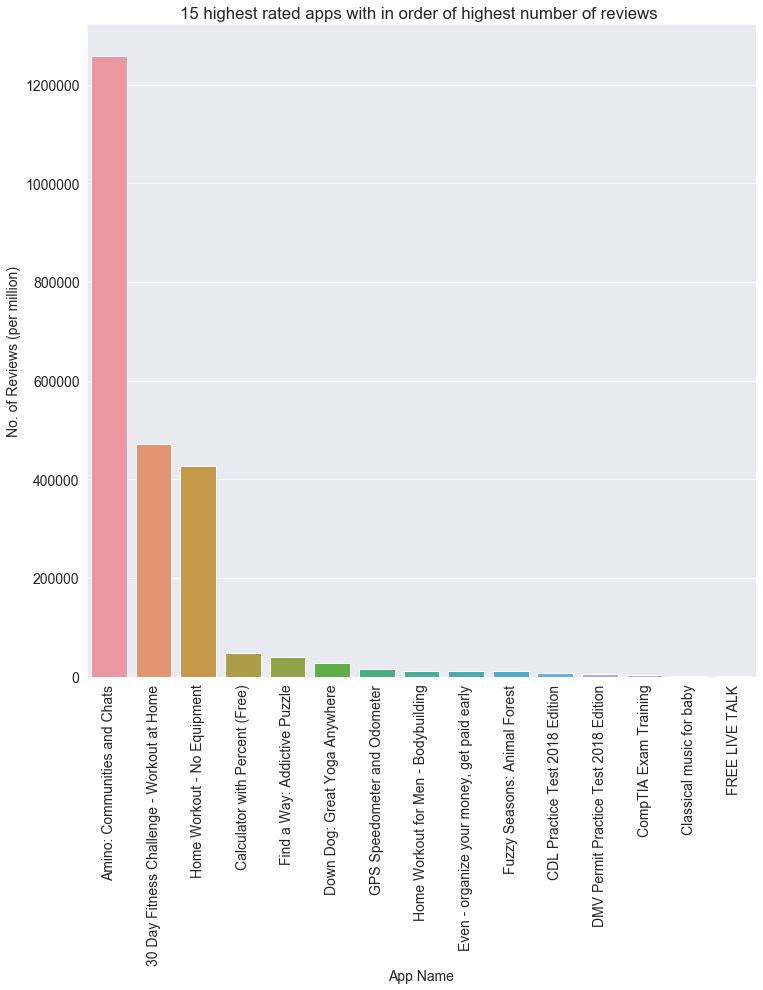

In [74]:
plt.figure(figsize=(12, 12))
plt.xticks(rotation = 90)

sns.barplot(data = highest_rating_and_reviews, y = highest_rating_and_reviews['Reviews'],x=highest_rating_and_reviews['App'])
plt.title("15 highest rated apps with in order of highest number of reviews ");
plt.xlabel('App Name')
plt.ylabel('No. of Reviews (per million)')


The top 15 apps were first sorted by their ratings and then by the number of reviews, to show the App with the highest rating and number of reviews. In this case, this app is Amino: Communities and Chats. Interestingly, this app is a social app, not a sports app which was the most popular genre.

# Question 4
Which category had the most apps that had to be paid for?

In [75]:
apps = merged_df[merged_df['Price']>0]
apps = apps.drop_duplicates(['App'])
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews per thousand,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
65497,Clue,GAME,4.6,19922.0,35.0,100000,Paid,1.99,Everyone 10+,Board,"July 30, 2018",2.2.5,5.0 and up,19.922,NaN,NaN,NaN,NaN
65537,Farming Simulator 18,GAME,4.5,18125.0,15.0,100000,Paid,4.99,Everyone,Simulation;Education,"July 9, 2018",Varies with device,4.4 and up,18.125,"Great game!!!!! When I got game great, recentl...",Negative,-0.209091,0.631818
65577,Call of Duty:Black Ops Zombies,GAME,4.2,13004.0,46.0,100000,Paid,6.99,Teen,Action,"December 20, 2016",1.0.11,2.3.3 and up,13.004,"This GAME DOESN'T EVEN LAUNCH!!! , every time ...",Negative,-0.081359,0.437037
74097,Dr. Panda & Toto's Treehouse,FAMILY,4.4,3396.0,9.5,50000,Paid,3.99,Everyone,Casual;Pretend Play,"December 9, 2014",1.8,4.0 and up,3.396,NaN,NaN,NaN,NaN
74777,Card Wars - Adventure Time,FAMILY,4.3,129603.0,23.0,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,"February 11, 2016",1.11.0,2.3.3 and up,129.603,NaN,NaN,NaN,NaN
74817,Essential Anatomy 3,MEDICAL,4.1,1533.0,42.0,50000,Paid,11.99,Mature 17+,Medical,"August 7, 2014",1.1.3,4.0.3 and up,1.533,Love work do. Tried all. Best anatomy android....,Positive,0.260000,0.445000
74977,EMT Tutor NREMT-B Study Guide,MEDICAL,4.6,625.0,8.4,10000,Paid,3.99,Everyone,Medical,"January 8, 2017",2.1,2.1 and up,0.625,NaN,NaN,NaN,NaN
88297,Camera FV-5,PHOTOGRAPHY,3.8,16320.0,0.0,100000,Paid,3.95,Everyone,Photography,"November 10, 2017",Varies with device,Varies with device,16.320,NaN,NaN,NaN,NaN
96137,Golfshot Plus: Golf GPS,SPORTS,4.1,3387.0,25.0,50000,Paid,29.99,Everyone,Sports,"July 11, 2018",4.18.0,4.1 and up,3.387,Update...downgrading 1 star. Weak GPS signal c...,Negative,-0.116667,0.333333
105449,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890.0,14.0,1000000,Paid,2.49,Everyone,Personalization,"August 24, 2016",5.7.8,2.3 and up,97.890,It's lovely widget app. But I'm gonna hold 2 s...,Positive,0.340000,0.550000


In [76]:
most_paid_category = apps['Category'].value_counts()
most_paid_category

PERSONALIZATION    3
GAME               3
FAMILY             2
MEDICAL            2
SPORTS             1
PHOTOGRAPHY        1
Name: Category, dtype: int64

In [77]:
highest_paid_category = apps.sort_values('Price', ascending = False) [['App','Category','Rating','Reviews','Installs','Genres','Price']]
highest_paid_category

,App,Category,Rating,Reviews,Installs,Genres,Price
96137,Golfshot Plus: Golf GPS,SPORTS,4.1,3387.0,50000,Sports,29.99
74817,Essential Anatomy 3,MEDICAL,4.1,1533.0,50000,Medical,11.99
106329,BIG Launcher,PERSONALIZATION,4.3,881.0,10000,Personalization,9.99
65577,Call of Duty:Black Ops Zombies,GAME,4.2,13004.0,100000,Action,6.99
65537,Farming Simulator 18,GAME,4.5,18125.0,100000,Simulation;Education,4.99
74097,Dr. Panda & Toto's Treehouse,FAMILY,4.4,3396.0,50000,Casual;Pretend Play,3.99
74977,EMT Tutor NREMT-B Study Guide,MEDICAL,4.6,625.0,10000,Medical,3.99
88297,Camera FV-5,PHOTOGRAPHY,3.8,16320.0,100000,Photography,3.95
74777,Card Wars - Adventure Time,FAMILY,4.3,129603.0,1000000,Card;Action & Adventure,2.99
105449,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890.0,1000000,Personalization,2.49


Of the apps that had to be paid for, they only came from three categories: 

- PERSONALIZATION which appeared 3 times,
- GAME which appeared 3 times,
- MEDICAL which appeared 2 times,
- FAMILY which appeared 2 times,
- SPORTS which appeared once,
- PHOTOGRAPHY which appeared once,

The top categories were Personalization and Game, however, as a little addition, I wanted to find out which item had the highest price and compare it to the number of installs, reviews and ratings.

## Question 5
What were the general sentiments of the 20 most installed apps. Compare to a random sample.

In [78]:
sentiments_most_installed = merged_df.sort_values('Installs',ascending=False)[['App','Translated_Review','Sentiment']]
sentiments_most_installed = sentiments_most_installed.drop_duplicates(['App'])

sentiments_most_installed = sentiments_most_installed.head(20)
sentiments_most_installed

,App,Translated_Review,Sentiment
6855,Hangouts,I'm wondering someone would instead making reg...,Neutral
107189,Google Drive,NaN,NaN
76979,Facebook,I know went wrong app. I issues facebook visit...,Negative
114469,Google News,This puts late night talk show hosts I hate fe...,Negative
6346,Google Chrome: Fast & Secure,NaN,NaN
98952,Google Street View,NaN,NaN
112924,Google Play Movies & TV,NaN,NaN
101236,Google,From last 2 days ok google detection stopped w...,Positive
77445,Google+,NaN,NaN
20527,Google Play Games,NaN,NaN


In [79]:
sentiments_most_installed_count = sentiments_most_installed['Sentiment'].value_counts()
sentiments_most_installed_count

Positive    5
Negative    3
Neutral     2
Name: Sentiment, dtype: int64

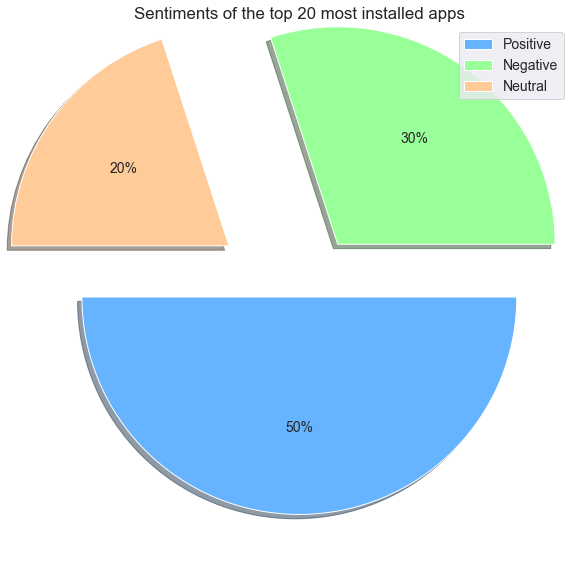

In [80]:
explode = (0.0,0.3,0.4)
labels = sentiments_most_installed_count.index
colors = ['#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(21,10))
plt.title('Sentiments of the top 20 most installed apps')
plt.pie(sentiments_most_installed_count, autopct='%1.0f%%', startangle=180, shadow=True, labeldistance=None,
       rotatelabels=True, explode=explode, colors= colors);
plt.legend(labels, loc='upper right')

In [81]:
sentiments_sample = merged_df.sort_values('Installs',ascending=False)[['App','Translated_Review','Sentiment']]
sentiments_sample = sentiments_most_installed.drop_duplicates(['App'])

sentiments_sample = sentiments_most_installed.sample(frac=0.94, replace=True, random_state=1)
sentiments_sample

,App,Translated_Review,Sentiment
98952,Google Street View,NaN,NaN
83380,Google Photos,The best cloud photo solution.. Unlimited stor...,Positive
2178,Google Play Books,NaN,NaN
77445,Google+,NaN,NaN
20527,Google Play Games,NaN,NaN
83380,Google Photos,The best cloud photo solution.. Unlimited stor...,Positive
98952,Google Street View,NaN,NaN
109446,Google Calendar,NaN,NaN
6855,Hangouts,I'm wondering someone would instead making reg...,Neutral
108830,Dropbox,dhd,Neutral


In [82]:
sentiments_sample_count = sentiments_sample['Sentiment'].value_counts()
sentiments_sample_count

Positive    5
Neutral     2
Name: Sentiment, dtype: int64

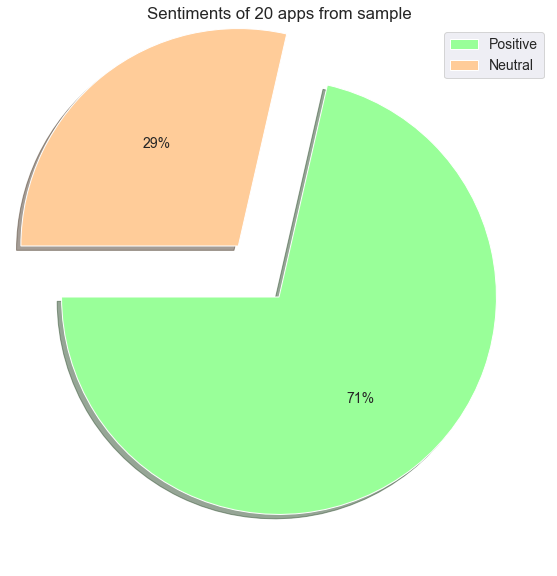

In [83]:
explode = (0.0,0.3)
labels = sentiments_sample_count.index
colors = ['#99ff99','#ffcc99']

plt.figure(figsize=(21,10))
plt.title('Sentiments of 20 apps from sample')
plt.pie(sentiments_sample_count, autopct='%1.0f%%', startangle=180, shadow=True, labeldistance=None,
       rotatelabels=True, explode=explode, colors= colors);
plt.legend(labels, loc='upper right')

The general sentiments of the top 20 apps are not as high in percentage as the sample but have similar results: in both charts, the highest sentiment is Postive. However, while there is no output for negative in the sample chart, this was the second highest value for the top twenty installe apps.

## Inferences and Conclusion

Now we have completed the questions, we can make some inferences.

There are number of inferences we can make from the data:

 - there are 115 genres of Apps
 
 - there are 6 Content ratings, the most popular being 'Everyone'
 
 - the app with the most reviews is Facebook
 
 - the highest rated category was 'AUTO_AND_VEHICLES'
 
 - while positive sentiment seemed to also show good sentiment polarity and rating score, there is no definite correlation
 
 - the difference in sentiment polarity in the most popular genre compared to the least popular genre was small
 
 - while there was only one outright popular genre, there were several for the least popular genres.
 
 - The category that had the highest Rating and highest number of reviews was the socail cateogory, with the app Amino: Communities and Chats.
 
 - Of the apps that had to be paid for, there were two top categories:

    PERSONALIZATION which appeared 3 times,
    GAME which appeared 3 times,

The top categories were Personalization and Game, however, as an addition, I wanted to find out which item had the highest price and compare it to the number of installs, reviews and ratings.

- The general sentiments of the top 20 apps are not as high in percentage as the sample but have similar results: in both charts, the highest sentiment is Postive. 


## References and Future Work


- https://www.kaggle.com/lava18/google-play-store-apps
- https://datacarpentry.org/python-ecology-lesson/03-index-slice-subset/index.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html?highlight=replace#pandas.Series.str.replace
- https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-4-analyzing-tabular-data-with-pandas
- https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-6-exploratory-data-analysis-a-case-study